In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


**1.3 Normalize Data**

**1.4 Reshape Data (Turn into grayscale)**

In [4]:
# Convert the images to grayscale
cifar100_train_images = tf.image.rgb_to_grayscale(cifar100_train_images)
cifar100_test_images = tf.image.rgb_to_grayscale(cifar100_test_images)

print("CIFAR-100 Grayscale Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Grayscale Testing images shape:", cifar100_test_images.shape)

CIFAR-100 Grayscale Training images shape: (50000, 32, 32, 1)
CIFAR-100 Grayscale Testing images shape: (10000, 32, 32, 1)


In [5]:
# Check size of one input image
cifar100_train_images[0].shape

TensorShape([32, 32, 1])

In [6]:
cifar100_train_labels[0]

array([19])

**1.5 One-hot encode labels**

In [7]:
cifar100_train_labels = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

**1.6 Verify Dataset Shape**

In [8]:
print ("Trainning images shape:", cifar100_train_images.shape)
print ("Trainning labels shape:", cifar100_train_labels.shape)
print ("Testing images shape:", cifar100_test_images.shape)
print ("Testing labels shape:", cifar100_test_labels.shape)

Trainning images shape: (50000, 32, 32, 1)
Trainning labels shape: (50000, 100)
Testing images shape: (10000, 32, 32, 1)
Testing labels shape: (10000, 100)


# 2. Model Building

**2.1 Basic ANN Model**

In [9]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 1)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,924 (2.68 MB)

 Trainable params: 701,924 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

**2.2 Basic CNN Model**

In [10]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 326,756 (1.25 MB)

 Trainable params: 326,756 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

**2.3 Deeper CNN Model**

In [11]:
import tensorflow as tf
from tensorflow import keras

deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,716 (5.29 MB)

 Trainable params: 1,387,268 (5.29 MB)

 Non-trainable params: 448 (1.75 KB)

# 3. Train models

**3.1 Train ANN Model**

In [12]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    cifar100_train_images,
    cifar100_train_labels,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0096 - loss: 23.0583
Epoch 1: val_loss improved from inf to 4.60535, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0096 - loss: 23.0392 - val_accuracy: 0.0099 - val_loss: 4.6054
Epoch 2/30
763/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0098 - loss: 4.6054
Epoch 2: val_loss improved from 4.60535 to 4.60533, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0098 - loss: 4.6054 - val_accuracy: 0.0101 - val_loss: 4.6053
Epoch 3/30
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0093 - loss: 4.6054
Epoch 3: val_loss did not improve from 4.60533
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0093 - loss: 4.6054 - val_accuracy: 0.0098 - val_loss: 4.6055
Epoch 4/30
767/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0100 - loss: 4.6094
Epoch 4: val_loss improved from 4.

In [13]:
cifar100_train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**3.2 Training Basic CNN Model**

In [14]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0434 - loss: 5.5426
Epoch 1: val_loss improved from inf to 3.81256, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0434 - loss: 5.5412 - val_accuracy: 0.1414 - val_loss: 3.8126
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1658 - loss: 3.6340
Epoch 2: val_loss improved from 3.81256 to 3.50214, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1658 - loss: 3.6337 - val_accuracy: 0.1925 - val_loss: 3.5021
Epoch 3/30
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2467 - loss: 3.1779
Epoch 3: val_loss improved from 3.50214 to 3.27641, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2467 - loss: 3.1775 - val_accuracy: 0.2387 - val_loss: 3.2764
Epoch 4/30
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s

3.3 Training Deeper CNN Model

In [15]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0125 - loss: 4.6865
Epoch 1: val_loss improved from inf to 4.54493, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.0125 - loss: 4.6864 - val_accuracy: 0.0230 - val_loss: 4.5449
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0229 - loss: 4.5312
Epoch 2: val_loss improved from 4.54493 to 4.35482, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.0229 - loss: 4.5311 - val_accuracy: 0.0541 - val_loss: 4.3548
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0584 - loss: 4.3067
Epoch 3: val_loss improved from 4.35482 to 4.04291, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0585 - loss: 4.3064 - val_accuracy: 0.1101 - val_loss: 4.0429
Epoch 4/30
777/782 ━━━━━━━━━━━━━━━━

In [16]:
print("Continuing Deeper CNN model training...")
deeper_cnn_history_continued = deeper_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels,
    epochs=60,  # Set a new, higher number of epochs
    initial_epoch=deeper_cnn_history.epoch[-1] + 1,  # Start from the next epoch
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Continuing Deeper CNN model training...
Epoch 31/60
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5394 - loss: 1.6633
Epoch 31: val_loss did not improve from 2.05848
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5394 - loss: 1.6634 - val_accuracy: 0.4692 - val_loss: 2.0651
Epoch 32/60
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5475 - loss: 1.6312
Epoch 32: val_loss did not improve from 2.05848
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5475 - loss: 1.6314 - val_accuracy: 0.4606 - val_loss: 2.0941
Epoch 33/60
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5522 - loss: 1.5942
Epoch 33: val_loss did not improve from 2.05848
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5521 - loss: 1.5946 - val_accuracy: 0.4692 - val_loss: 2.0979
Epoch 34/60
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5658 - loss: 1.5582
Epoch 34: val_loss did not improve from 2.05848
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5658 - loss: 1

/tmp/ipython-input-1639019383.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


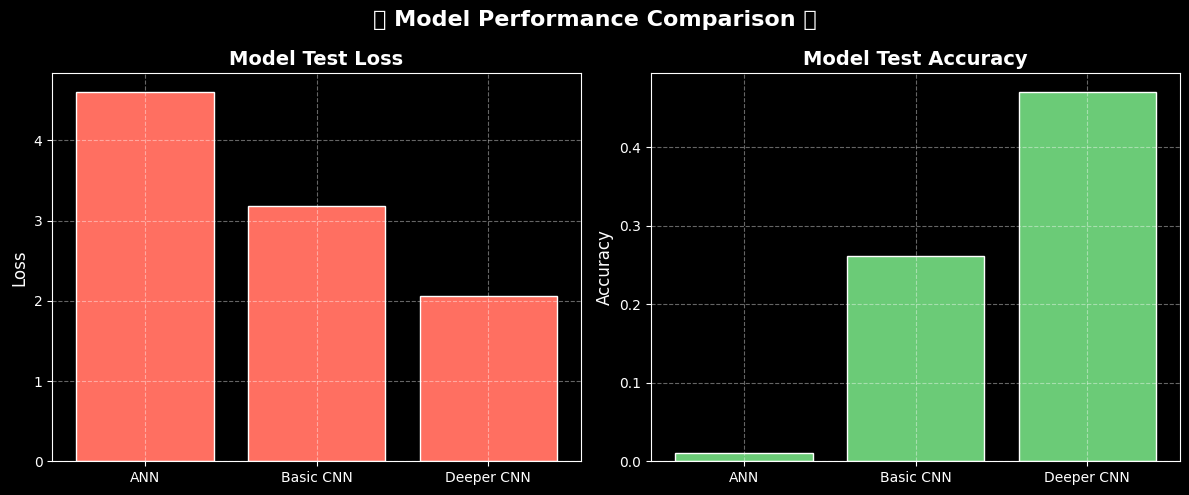

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(cifar100_test_images, cifar100_test_labels, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


4.2 Model Evaluation (Confusion Matrix & Report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


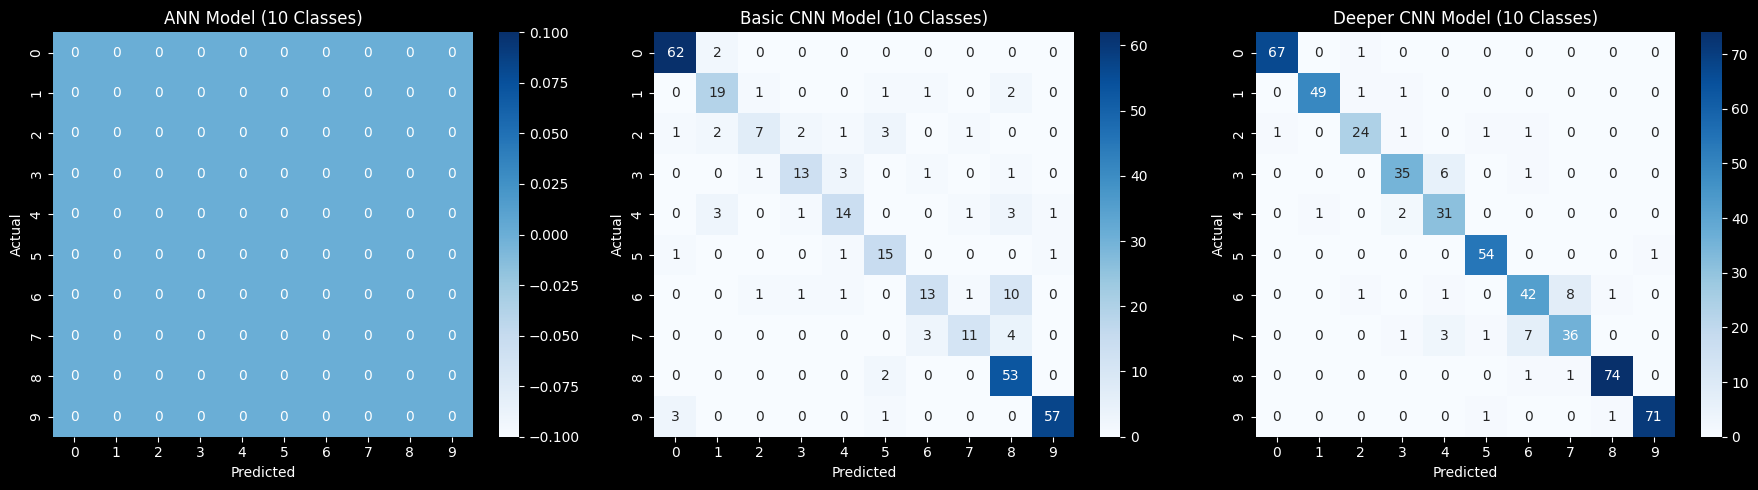

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ann_predictions = ann_model.predict(cifar100_test_images)
basic_cnn_predictions = basic_cnn_model.predict(cifar100_test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(cifar100_test_images)

test_labels_int = np.argmax(cifar100_test_labels, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

subset_indices = np.where(np.isin(test_labels_int, np.arange(10)))
subset_labels = test_labels_int[subset_indices]
subset_ann_pred = ann_predicted_labels[subset_indices]
subset_basic_pred = basic_cnn_predicted_labels[subset_indices]
subset_deeper_pred = deeper_cnn_predicted_labels[subset_indices]

cm_ann_subset = confusion_matrix(subset_labels, subset_ann_pred, labels=np.arange(10))
cm_basic_subset = confusion_matrix(subset_labels, subset_basic_pred, labels=np.arange(10))
cm_deeper_subset = confusion_matrix(subset_labels, subset_deeper_pred, labels=np.arange(10))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann_subset, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model (10 Classes)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic_subset, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model (10 Classes)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper_subset, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model (10 Classes)")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

4.3 Model Comparison

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

In [20]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


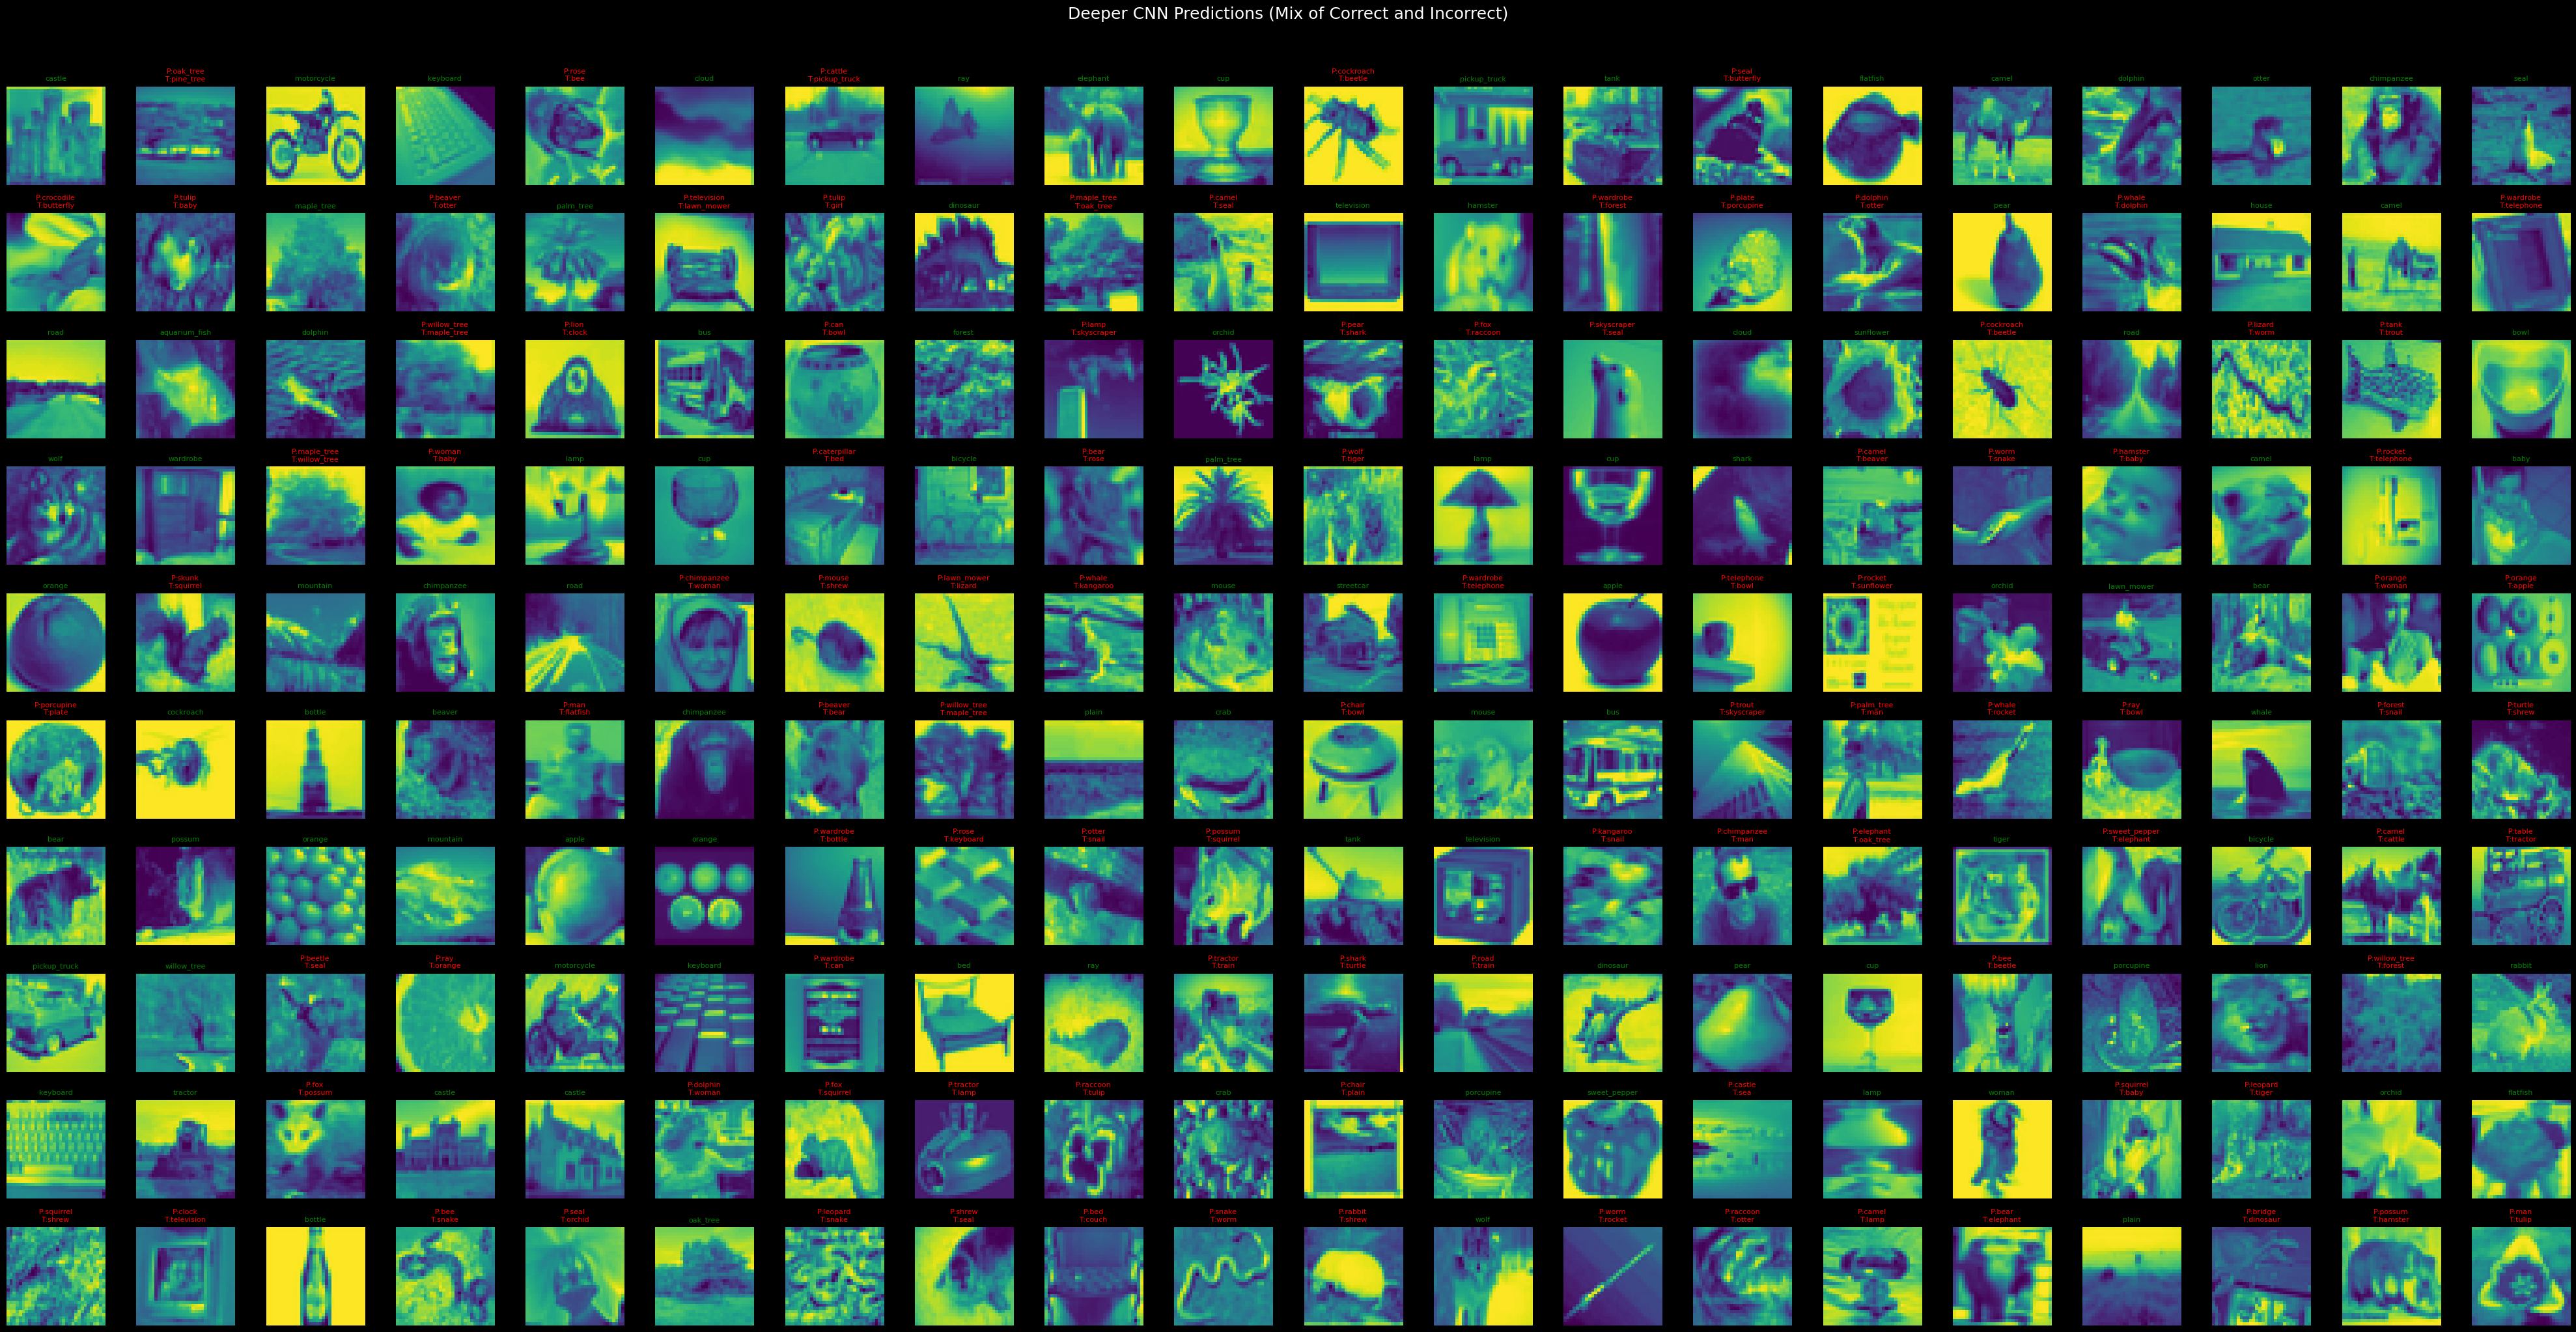

Total test samples: 10000
Correctly classified: 4706 (47.06%)
Incorrectly classified: 5294 (52.94%)
Showing 100 correct and 100 incorrect predictions


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Get predictions from the model
deeper_cnn_predictions = deeper_cnn_model.predict(cifar100_test_images)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Convert test labels from one-hot to integer format
cifar100_test_labels_int = np.argmax(cifar100_test_labels, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(deeper_cnn_predicted_labels == cifar100_test_labels_int)[0]
incorrectly_classified_indices = np.where(deeper_cnn_predicted_labels != cifar100_test_labels_int)[0]

# Set number of images to show
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't exceed available samples
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

# Randomly select indices
selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Set up the plot
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Deeper CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

# Display images
for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols

    # Display image (assuming CIFAR-100 images are 32x32x3)
    axes[row, col].imshow(cifar100_test_images[idx])

    # Get predicted and true class names
    pred = class_names[deeper_cnn_predicted_labels[idx]]
    true = class_names[cifar100_test_labels_int[idx]]

    # Set title color based on correctness
    if deeper_cnn_predicted_labels[idx] == cifar100_test_labels_int[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Total test samples: {len(cifar100_test_labels_int)}")
print(f"Correctly classified: {len(correctly_classified_indices)} ({len(correctly_classified_indices)/len(cifar100_test_labels_int)*100:.2f}%)")
print(f"Incorrectly classified: {len(incorrectly_classified_indices)} ({len(incorrectly_classified_indices)/len(cifar100_test_labels_int)*100:.2f}%)")
print(f"Showing {num_correct_to_show} correct and {num_incorrect_to_show} incorrect predictions")